# **Importaciones de librerias**

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


from imblearn.over_sampling import SMOTE

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Preparación de los Datos

In [205]:
df=pd.read_csv('/content/datosTELECOMX_part1.csv')

In [206]:
df.head()

,Churned,Gender,Is_Senior,Has_Partner,Has_Dependents,Tenure_Months,Has_Phone_Service,Has_Multiple_Lines,Internet_Service_Type,Has_Online_Security,...,Has_Device_Protection,Has_Tech_Support,Has_Streaming_TV,Has_Streaming_Movies,Contract_Type,Uses_Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Daily_Billing
0,False,Female,False,True,True,9,True,False,DSL,False,...,False,True,True,False,One year,True,Mailed check,65.6,593.30,2.19
1,False,Male,False,False,False,9,True,True,DSL,False,...,False,False,False,True,Month-to-month,False,Mailed check,59.9,542.40,2.00
2,True,Male,False,False,False,4,True,False,Fiber optic,False,...,True,False,False,False,Month-to-month,True,Electronic check,73.9,280.85,2.46
3,True,Male,True,True,False,13,True,False,Fiber optic,False,...,True,False,True,True,Month-to-month,True,Electronic check,98.0,1237.85,3.27
4,True,Female,True,True,False,3,True,False,Fiber optic,False,...,False,True,True,False,Month-to-month,True,Mailed check,83.9,267.40,2.80


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Churned                 7032 non-null   bool   
 1   Gender                  7032 non-null   object 
 2   Is_Senior               7032 non-null   bool   
 3   Has_Partner             7032 non-null   bool   
 4   Has_Dependents          7032 non-null   bool   
 5   Tenure_Months           7032 non-null   int64  
 6   Has_Phone_Service       7032 non-null   bool   
 7   Has_Multiple_Lines      7032 non-null   bool   
 8   Internet_Service_Type   7032 non-null   object 
 9   Has_Online_Security     7032 non-null   bool   
 10  Has_Online_Backup       7032 non-null   bool   
 11  Has_Device_Protection   7032 non-null   bool   
 12  Has_Tech_Support        7032 non-null   bool   
 13  Has_Streaming_TV        7032 non-null   bool   
 14  Has_Streaming_Movies    7032 non-null   

Es necesario convertir las variables booleanas en entero para poder hacer uso de modelos de Machine learning

In [208]:
#Convertir variables booleanas a numéricas
bool_cols = ['Churned', 'Is_Senior', 'Has_Partner', 'Has_Dependents',
             'Has_Phone_Service', 'Has_Online_Security', 'Has_Online_Backup',
             'Has_Device_Protection', 'Has_Tech_Support', 'Has_Streaming_TV',
             'Has_Streaming_Movies', 'Uses_Paperless_Billing']

df[bool_cols] = df[bool_cols].astype(int)

Algunas variables es mejor tratarlas con el metodo de pandas de get_dummies para que no haya errores en los futuros modelos

In [209]:
#Columnas categóricas para get_dummies
categorical_cols = ['Internet_Service_Type', 'Contract_Type', 'Payment_Method', 'Gender']

In [210]:
# 1. Aplicar pd.get_dummies() directamente en el DataFrame original
df = pd.get_dummies(
    df,
    columns=categorical_cols,
    prefix=categorical_cols,
)

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Churned                                   7032 non-null   int64  
 1   Is_Senior                                 7032 non-null   int64  
 2   Has_Partner                               7032 non-null   int64  
 3   Has_Dependents                            7032 non-null   int64  
 4   Tenure_Months                             7032 non-null   int64  
 5   Has_Phone_Service                         7032 non-null   int64  
 6   Has_Multiple_Lines                        7032 non-null   bool   
 7   Has_Online_Security                       7032 non-null   int64  
 8   Has_Online_Backup                         7032 non-null   int64  
 9   Has_Device_Protection                     7032 non-null   int64  
 10  Has_Tech_Support                    

#Correlación y Selección de Variables

In [212]:
corr=df.corr()

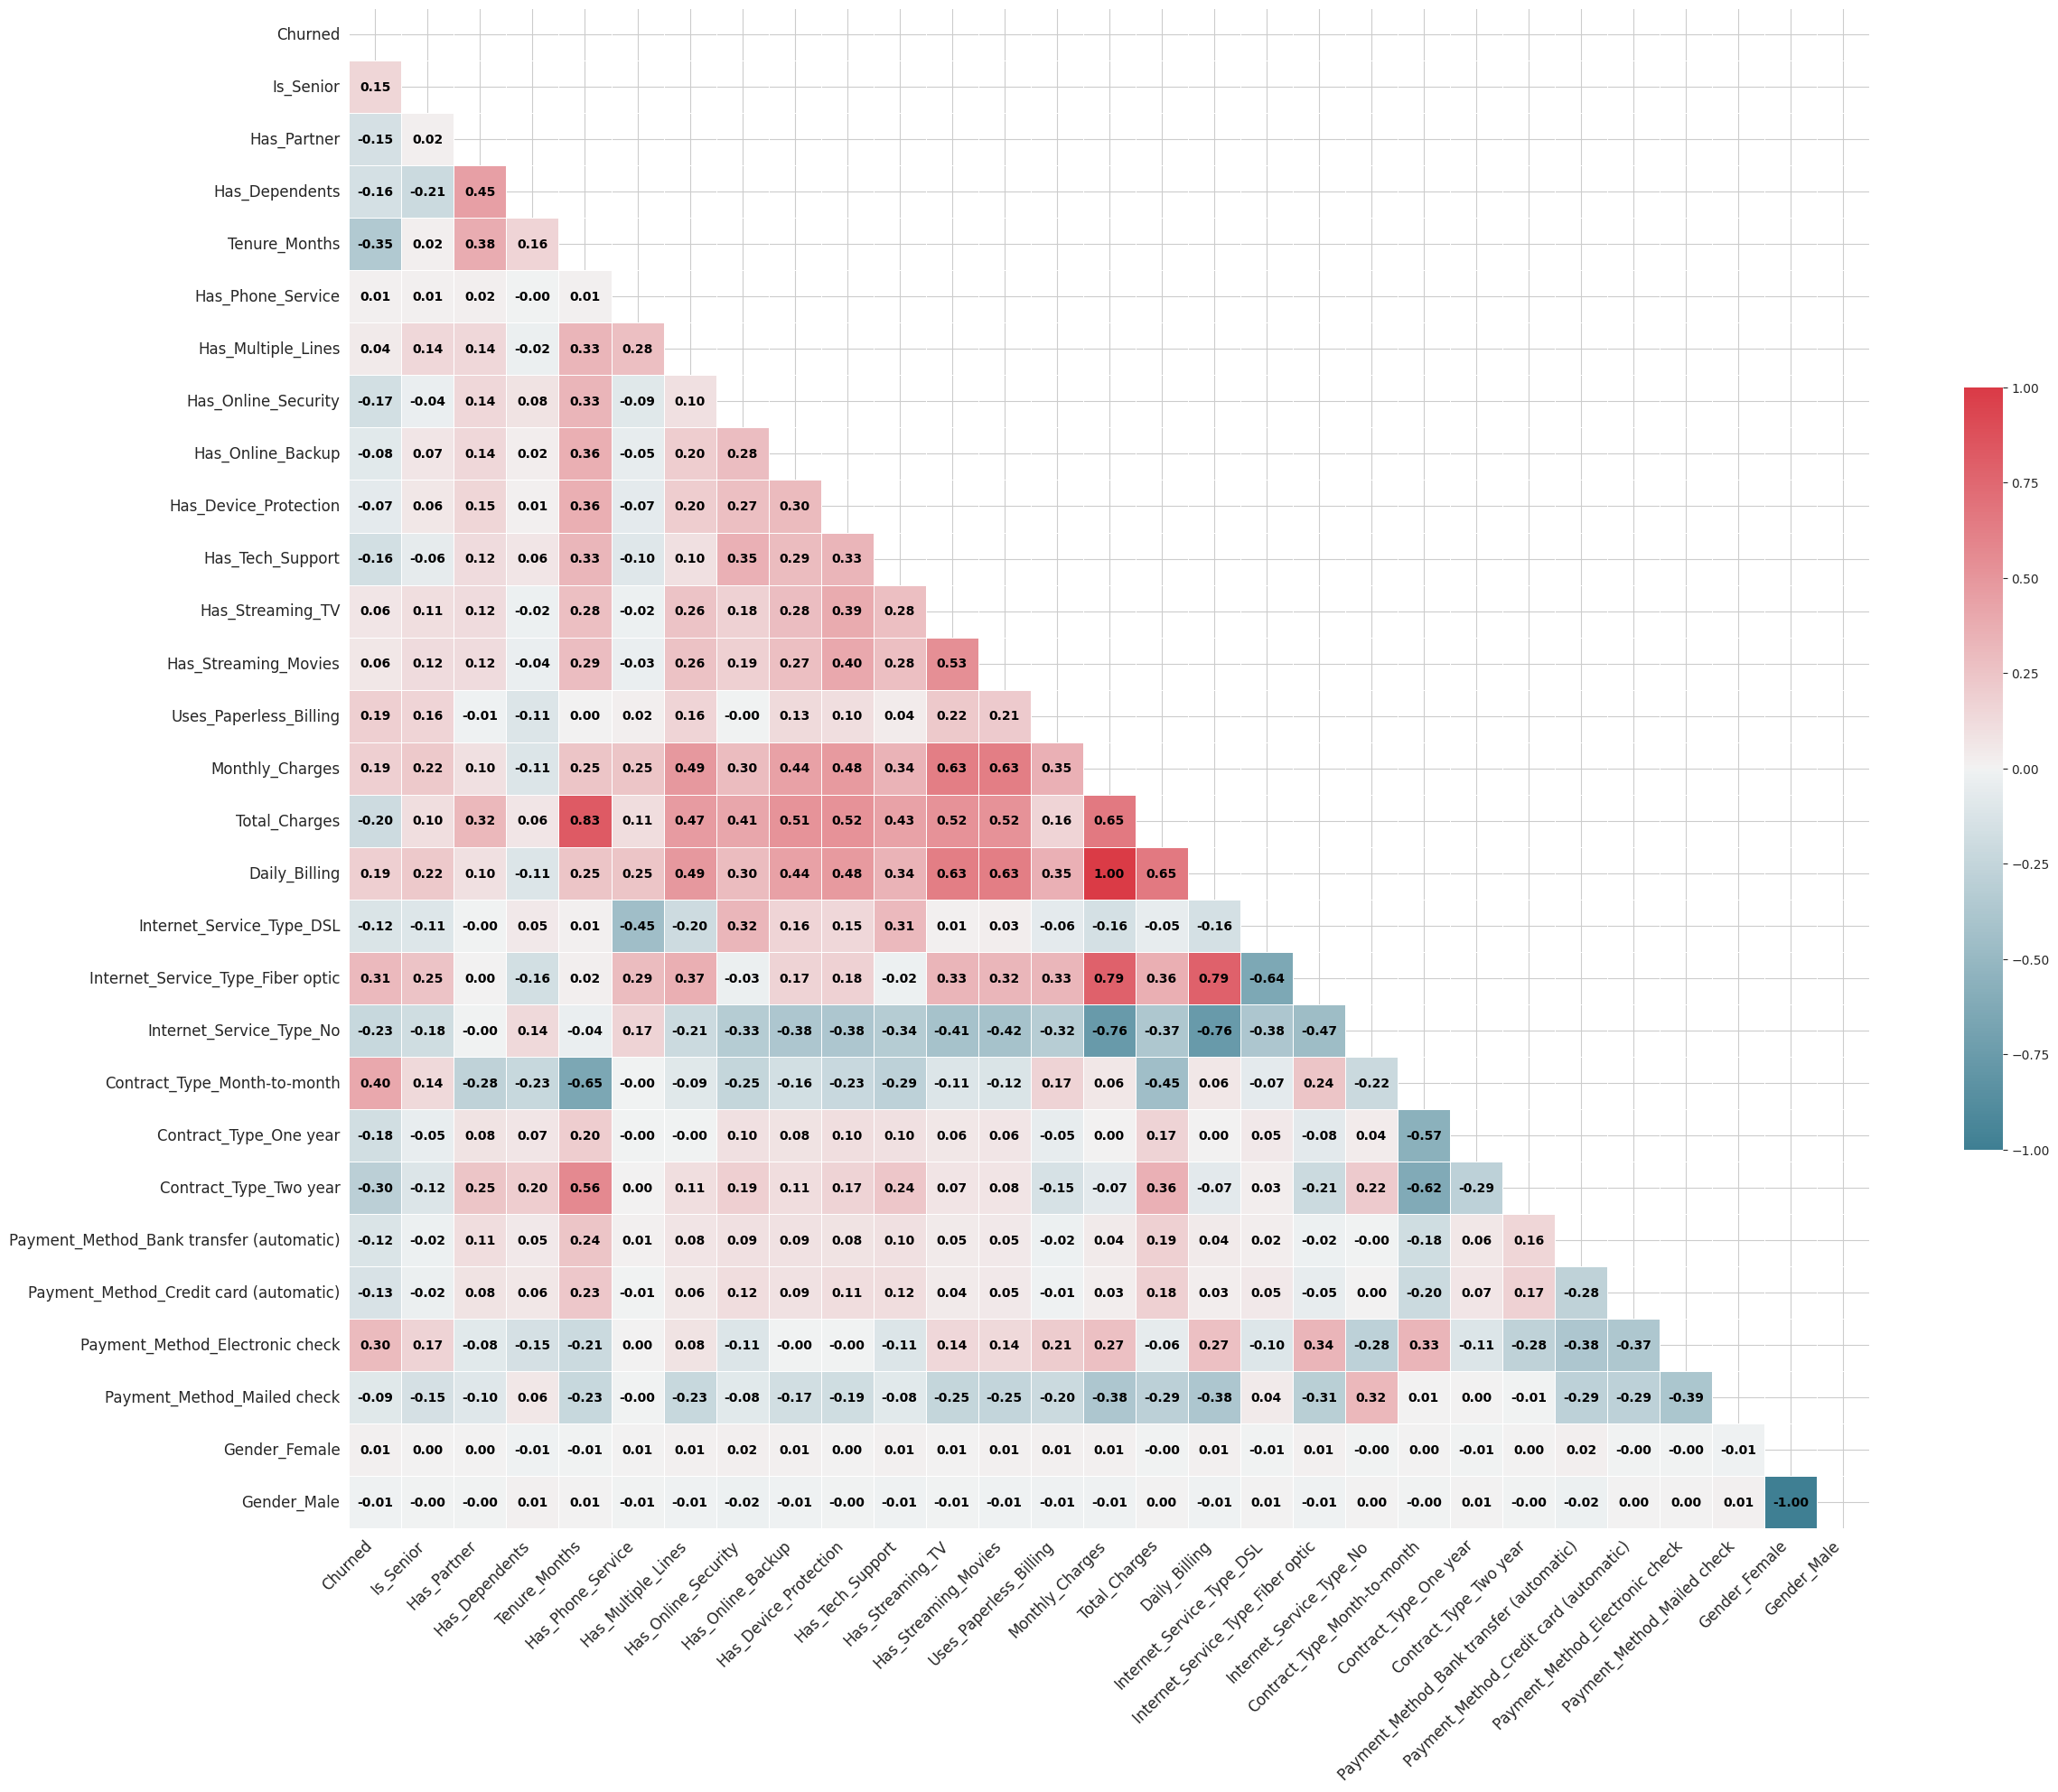

In [213]:
# Configurar la figura con un tamaño más grande y resolución
f, ax = plt.subplots(figsize=(25, 20), dpi=100)

# Máscara para el triángulo superior
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Personalización avanzada del heatmap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

heatmap = sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=1,
    vmin=-1,
    center=0,
    square=True,
    linewidths=0.5,
    annot=True,
    fmt=".2f",  # Muestra 2 decimales
    annot_kws={
        "size": 10,  # Tamaño de fuente de los números
        "weight": "bold",  # Negrita
        "color": "black"  # Color del texto
    },
    cbar_kws={"shrink": 0.5},
    ax=ax
)

# Rotar las etiquetas del eje X para mejor legibilidad
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Ajustar el espacio entre los subplots para que no se corten las etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [214]:
corr['Churned'].sort_values(ascending=False)

,Churned
Churned,1.000000
Contract_Type_Month-to-month,0.404565
Internet_Service_Type_Fiber optic,0.307463
Payment_Method_Electronic check,0.301455
Daily_Billing,0.192914
Monthly_Charges,0.192858
Uses_Paperless_Billing,0.191454
Is_Senior,0.150541
Has_Streaming_TV,0.063254
Has_Streaming_Movies,0.060860


### **Análisis de Correlación con la Variable Objetivo "Churned"**  

Columnas como Monthly_Charges y Daily_Billing tienen una correlación 1, por lo que es necesario eliminar para no obtener una mala predicción a la hora de entrenar el modelo.

En el caso de Has_Phone_Service, onehotencoder__Gender_Female y onehotencoder__Gender_Male no tienen una correlación significativa para usarla un modelo, por lo que hay que descartarlas.

#### **Variables con Correlación Positiva (Mayor probabilidad de Churn)**:  
🔹 **`Contract_Type_Month-to-month` (0.40)**: Los clientes con contrato mes a mes tienen la correlación más alta con el abandono.  
🔹 **`Internet_Service_Type_Fiber optic` (0.31)**: Los usuarios de fibra óptica tienden a abandonar más.  
🔹 **`Payment_Method_Electronic check` (0.30)**: El pago con cheque electrónico está asociado a mayor churn.  
🔹 **`Daily_Billing` (0.19) y `Monthly_Charges` (0.19)**: A mayor gasto diario/mensual, mayor probabilidad de abandono.  
🔹 **`Uses_Paperless_Billing` (0.19)**: Los clientes con factura digital tienen mayor tendencia a irse.  
🔹 **`Is_Senior` (0.15)**: Los clientes mayores (seniors) tienen un ligero riesgo más alto.  

---

#### **Variables con Correlación Negativa (Menor probabilidad de Churn)**:  
🔹 **`Tenure_Months` (-0.35)**: A mayor antigüedad (meses como cliente), menor riesgo de abandono.  
🔹 **`Contract_Type_Two year` (-0.30)**: Los contratos de 2 años reducen fuertemente el churn.  
🔹 **`Internet_Service_Type_No` (-0.23)**: Clientes sin servicio de internet (solo otros servicios) son más retenidos.  
🔹 **`Total_Charges` (-0.20)**: Clientes que han pagado más en total (historial largo) se quedan más.  
🔹 **`Has_Online_Security` (-0.17) y `Has_Tech_Support` (-0.16)**: Servicios de seguridad y soporte técnico retienen clientes.  
🔹 **`Has_Partner` (-0.15) y `Has_Dependents` (-0.16)**: Clientes con pareja o dependientes son más estables.  

---

#### **Variables con Impacto Mínimo o Neutro**:  
▫️ **`Has_Streaming_TV` (0.06) y `Has_Streaming_Movies` (0.06)**: Poco impacto en el churn.  
▫️ **`Gender` (valores cercanos a 0)**: No hay diferencia significativa entre géneros.  


In [215]:
#Eliminar variables
columns_delete=['Gender_Female','Gender_Male','Monthly_Charges', 'Has_Phone_Service']

In [216]:
df=df.drop(columns=columns_delete, axis=1)

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Churned                                   7032 non-null   int64  
 1   Is_Senior                                 7032 non-null   int64  
 2   Has_Partner                               7032 non-null   int64  
 3   Has_Dependents                            7032 non-null   int64  
 4   Tenure_Months                             7032 non-null   int64  
 5   Has_Multiple_Lines                        7032 non-null   bool   
 6   Has_Online_Security                       7032 non-null   int64  
 7   Has_Online_Backup                         7032 non-null   int64  
 8   Has_Device_Protection                     7032 non-null   int64  
 9   Has_Tech_Support                          7032 non-null   int64  
 10  Has_Streaming_TV                    

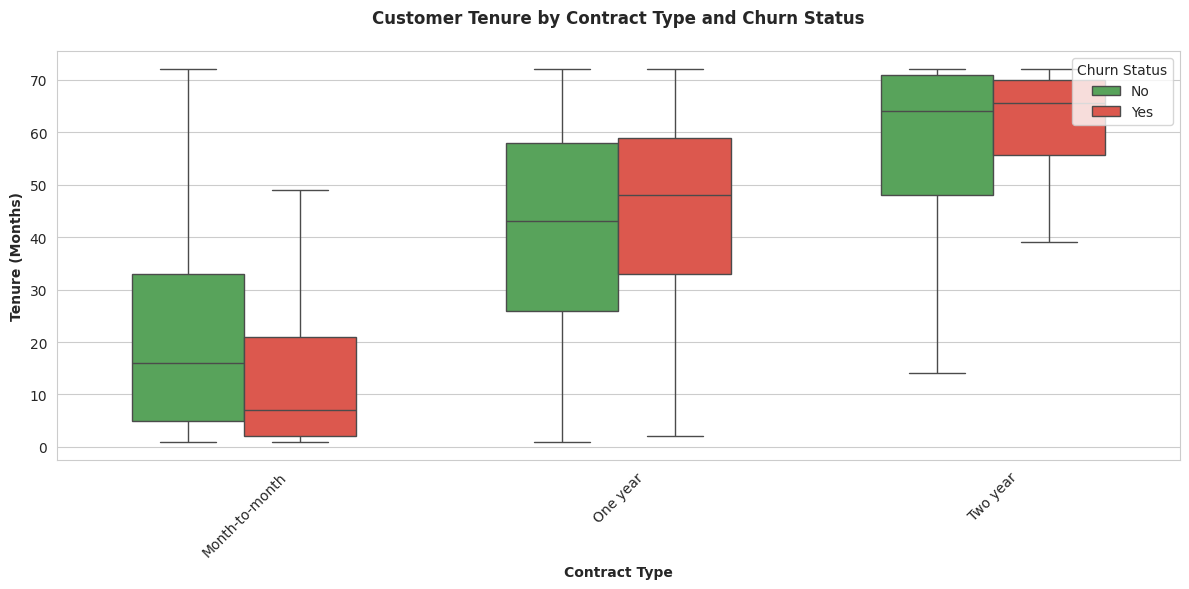

In [218]:
# Crear DataFrame para visualización (solo con las columnas necesarias)
plot_data = pd.DataFrame({
    'Tenure_Months': df['Tenure_Months'],  # Antigüedad en meses
    'Churned': df['Churned'],  # Variable objetivo (1: Canceló, 0: No canceló)
})

# Detectar dinámicamente las columnas one-hot de Contract_Type
contract_cols = [c for c in df.columns if c.startswith("Contract_Type_")]

# Reconstruir la categoría original (quita el prefijo "Contract_Type_")
plot_data['Contract_Type_Visual'] = df[contract_cols].idxmax(axis=1).str.replace("Contract_Type_", "")

# Configuración del gráfico
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")  # Fondo con cuadrícula blanca

# Crear el diagrama de cajas
boxplot = sns.boxplot(
    x='Contract_Type_Visual',  # Eje X: Tipo de contrato
    y='Tenure_Months',        # Eje Y: Tiempo como cliente en meses
    hue='Churned',            # Color por estado de churn
    data=plot_data,
    palette={0: '#4CAF50', 1: '#F44336'},  # Verde: No churn, Rojo: Churn
    showfliers=False,         # Ocultar valores atípicos
    width=0.6,                # Ancho de las cajas
    order=['Month-to-month', 'One year', 'Two year']

)

# Personalizar la leyenda
handles, labels = boxplot.get_legend_handles_labels()
plt.legend(
    handles,
    ['No', 'Yes'],  # Etiquetas en inglés
    title='Churn Status',        # Título de leyenda
    loc='upper right'            # Posición
)

# Añadir títulos y etiquetas (en inglés)
plt.title('Customer Tenure by Contract Type and Churn Status', fontweight='bold', pad=20)
plt.xlabel('Contract Type', fontweight='semibold')
plt.ylabel('Tenure (Months)', fontweight='semibold')
plt.xticks(rotation=45)  # Rotar etiquetas del eje X
plt.tight_layout()       # Ajustar layout
plt.show()

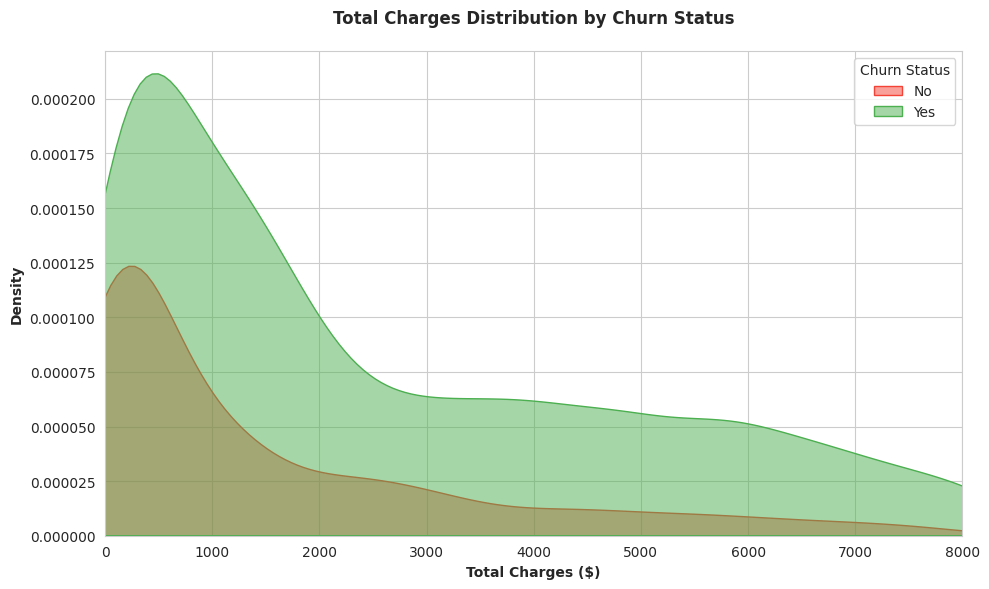

In [219]:
# Configuración del gráfico
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")  # Estilo con cuadrícula blanca

# Crear gráfico de densidad (KDE)
density_plot = sns.kdeplot(
    data=df,
    x='Total_Charges',      # Eje X: Gasto total
    hue='Churned',          # Separar por estado de churn
    palette={0: '#4CAF50',  # Verde: No canceló
             1: '#F44336'}, # Rojo: Canceló
    fill=True,              # Rellenar áreas
    alpha=0.5,             # Transparencia
    linewidth=1            # Grosor de línea
)

# Personalizar leyenda
plt.legend(
    ['No', 'Yes'],  # Etiquetas en inglés
    title='Churn Status',        # Título de leyenda
    frameon=True                # Marco alrededor
)

# Añadir títulos y etiquetas (en inglés)
plt.title('Total Charges Distribution by Churn Status', fontweight='bold', pad=20)
plt.xlabel('Total Charges ($)', fontweight='semibold')
plt.ylabel('Density', fontweight='semibold')

# Ajustar límites del eje X para mejor visualización
plt.xlim(0, 8000)  # Mostrar hasta $8000

# Mostrar gráfico
plt.tight_layout()
plt.show()

# **Modelos predictivos**

## **Datos de entrenamiento y testeo**

In [220]:
# Dividir los datos en entrenamiento y prueba (70/30)
X = df.drop('Churned', axis=1)  # Features (todas las columnas excepto el target)
y = df['Churned']               # Variable objetivo

# Split (conservando proporción de churn en ambos conjuntos)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,              # 30% para prueba
    random_state=42,            # Semilla para reproducibilidad
    stratify=y                  # Mantener balance de clases
)

## **Modelo Dummy**

Este modelo sirve como base para comparar con otros

In [221]:
dummy = DummyClassifier(random_state=42)

In [222]:
# Entrenar y evaluar en TEST (sin SMOTE ni validación cruzada)
dummy.fit(X_train, y_train)

print(f'Method Dummy Acurracy: {dummy.score(X_test, y_test)}')

Method Dummy Acurracy: 0.7341232227488151


## **Usar SMOTE**

Se utiliza para poder tener los datos uniformes y poder obtener mejores modelos

In [223]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", np.bincount(y_train))
print("After SMOTE:", np.bincount(y_train_res))

Before SMOTE: [3614 1308]
After SMOTE: [3614 3614]


## **Función de las metricas**

In [224]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Entrenamiento
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Métricas
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("-"*40)


## **Modelo 1 : Decision Tree**

In [225]:
# ------------------------------
# Modelo 1: Decision Tree
# ------------------------------
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
evaluate_model(dt_model, X_train_res, X_test, y_train_res, y_test)

Model: DecisionTreeClassifier
Accuracy: 0.7735
Precision: 0.5695
Recall: 0.6061
F1-score: 0.5872
Confusion Matrix:
[[1292  257]
 [ 221  340]]
----------------------------------------


In [226]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
dt_scores = cross_validate(dt_model, X_train_res, y_train_res, cv=kf,
                           scoring=["accuracy", "precision", "recall", "f1"])

print("Cross-validation (Decision Tree):")
print({m: np.mean(scores) for m, scores in dt_scores.items() if "test" in m})
print("="*60)


Cross-validation (Decision Tree):
{'test_accuracy': np.float64(0.8224919237892863), 'test_precision': np.float64(0.838576634819163), 'test_recall': np.float64(0.7988629591438727), 'test_f1': np.float64(0.8180862345779888)}


## **Modelo 2: Random Forest**

In [227]:
rf_model = RandomForestClassifier(max_depth=5, random_state=42)
evaluate_model(rf_model, X_train_res, X_test, y_train_res, y_test)

Model: RandomForestClassifier
Accuracy: 0.7611
Precision: 0.5358
Recall: 0.7611
F1-score: 0.6289
Confusion Matrix:
[[1179  370]
 [ 134  427]]
----------------------------------------


In [228]:
# ------------------------------
# Validación cruzada con KFold (Random Forest)
# ------------------------------
rf_scores = cross_validate(rf_model, X_train_res, y_train_res, cv=kf,
                           scoring=["accuracy", "precision", "recall", "f1"])
print("Cross-validation (Random Forest):")
print({m: np.mean(scores) for m, scores in rf_scores.items() if "test" in m})
print("="*60)

Cross-validation (Random Forest):
{'test_accuracy': np.float64(0.8331455345135369), 'test_precision': np.float64(0.8031265581217909), 'test_recall': np.float64(0.8829356899775277), 'test_f1': np.float64(0.8411182038627816)}


# Análisis de Cancelación de Clientes (Churn)

## 1. Descripción del Problema
El objetivo de este análisis es identificar los factores que influyen en la **cancelación de clientes** (churn) y evaluar modelos predictivos que permitan detectar clientes en riesgo. Se trabajó con un conjunto de datos desbalanceado, por lo que se aplicó **SMOTE** para balancear la clase minoritaria.

Se evaluaron dos modelos: **Árbol de Decisión (Decision Tree)** y **Bosque Aleatorio (Random Forest)**.

---

## 2. Resultados de Modelos

### 2.1 Decision Tree (max_depth=5)
**Métricas en conjunto de prueba:**

| Métrica      | Valor |
|-------------|-------|
| Accuracy    | 0.7735 |
| Precision   | 0.5695 |
| Recall      | 0.6061 |
| F1-score    | 0.5872 |

**Matriz de confusión:**

[[1292,  257]]

[ 221,  340]]


**Validación cruzada (5 folds):**

| Métrica      | Valor |
|-------------|-------|
| Accuracy    | 0.8225 |
| Precision   | 0.8386 |
| Recall      | 0.7989 |
| F1-score    | 0.8181 |

---

### 2.2 Random Forest (max_depth=5)
**Métricas en conjunto de prueba:**

| Métrica      | Valor |
|-------------|-------|
| Accuracy    | 0.7611 |
| Precision   | 0.5358 |
| Recall      | 0.7611 |
| F1-score    | 0.6289 |

**Matriz de confusión:**

[[1179, 370]

[ 134, 427]]


**Validación cruzada (5 folds):**

| Métrica      | Valor |
|-------------|-------|
| Accuracy    | 0.8331 |
| Precision   | 0.8031 |
| Recall      | 0.8829 |
| F1-score    | 0.8411 |

---

## 3. Análisis Comparativo

- Aunque **Decision Tree** muestra un **accuracy ligeramente mayor**, esto se debe a la mayoría de la clase no churn, lo que inflaría la exactitud.  
- **Random Forest** muestra mejor **recall** y **F1-score**, lo que indica que **detecta mejor a los clientes que realmente cancelan**, siendo más útil para estrategias de retención.  
- La **validación cruzada** confirma que Random Forest es más consistente en distintos subconjuntos del entrenamiento.

**Conclusión:** **Random Forest** es el modelo recomendado para predecir cancelación de clientes.

---

## 4. Factores que Más Influyen en la Cancelación

Basado en las variables seleccionadas y en la interpretación de los modelos:

- **Contract Type (Tipo de contrato):**  
  Clientes con contrato **Month-to-month** tienen mayor probabilidad de cancelar que aquellos con contrato de 1 o 2 años.
  
- **Tenure Months (Tiempo como cliente):**  
  Clientes con menor antigüedad tienden a cancelar más.  

- **Internet Service Type:**  
  La ausencia de servicios de internet o servicios limitados puede aumentar la cancelación.

- **Servicios Adicionales:**  
  Variables como **Online Security**, **Device Protection**, **Tech Support** y **Streaming Services** muestran influencia: la falta de estos servicios se relaciona con mayor churn.

- **Paperless Billing y Métodos de Pago:**  
  Algunos métodos de pago y el uso de facturación digital también afectan la cancelación.

> Nota: Los modelos de árbol permiten identificar estas variables como más relevantes mediante su capacidad de dividir los datos según el impacto en la variable objetivo.

---

## 5. Estrategias de Retención Propuestas

Basándose en los factores identificados:

1. **Ofertas de contrato más largo:**  
   Incentivar contratos de 1 o 2 años con descuentos o beneficios exclusivos.

2. **Programas de fidelización para clientes nuevos:**  
   Clientes con baja antigüedad podrían recibir promociones, atención personalizada o paquetes de servicios combinados.

3. **Mejorar servicios adicionales:**  
   Incentivar la contratación de servicios como soporte técnico, seguridad online o streaming, que parecen reducir churn.

4. **Segmentación por tipo de pago:**  
   Evaluar incentivos para métodos de pago que disminuyan la cancelación.

5. **Campañas de retención proactiva:**  
   Identificar clientes en riesgo (usando el modelo Random Forest) y contactarlos antes de que cancelen con promociones o encuestas de satisfacción.

---

## 6. Conclusión General

- **Random Forest** con SMOTE es el mejor modelo para predecir churn en este dataset desbalanceado.  
- Variables más críticas: **tipo de contrato, antigüedad, servicios adicionales y método de pago**.  
- Las estrategias de retención deben enfocarse en **contratos más largos, fidelización de clientes nuevos y servicios adicionales** para reducir la cancelación.

